<a href="https://colab.research.google.com/github/VexBane777/Unlox/blob/main/Unlox_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'insurance.csv' found. Loading data...

--- Data Understanding ---
First 5 rows of the DataFrame:
   age     sex   bmi  children smoker     region  charges
0   56    male  27.1         2     no  southeast  8007.14
1   46  female  36.7         2     no  southeast  7378.30
2   32    male  16.6         2     no  southwest  5199.18
3   60  female  45.5         2     no  northwest  9881.21
4   25    male  49.1         1     no  southeast  4732.42

Shape of the DataFrame:
(1000, 7)

Column names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   ob

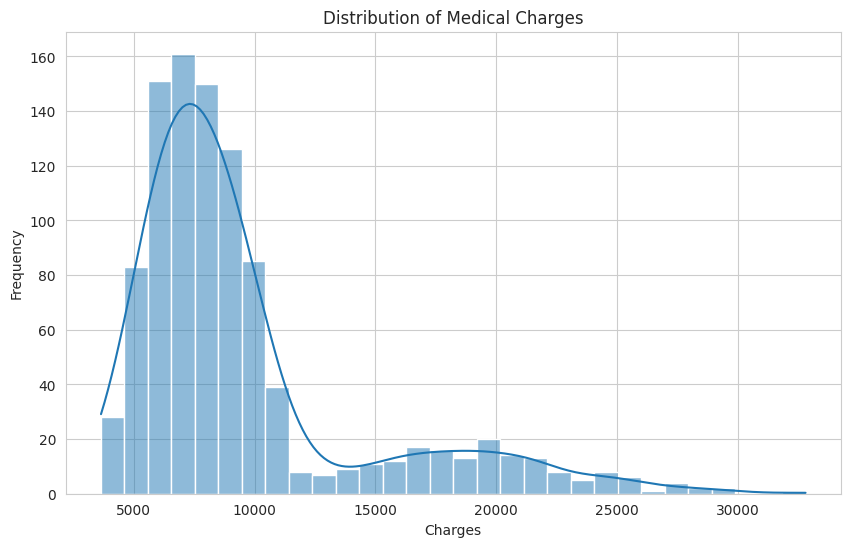

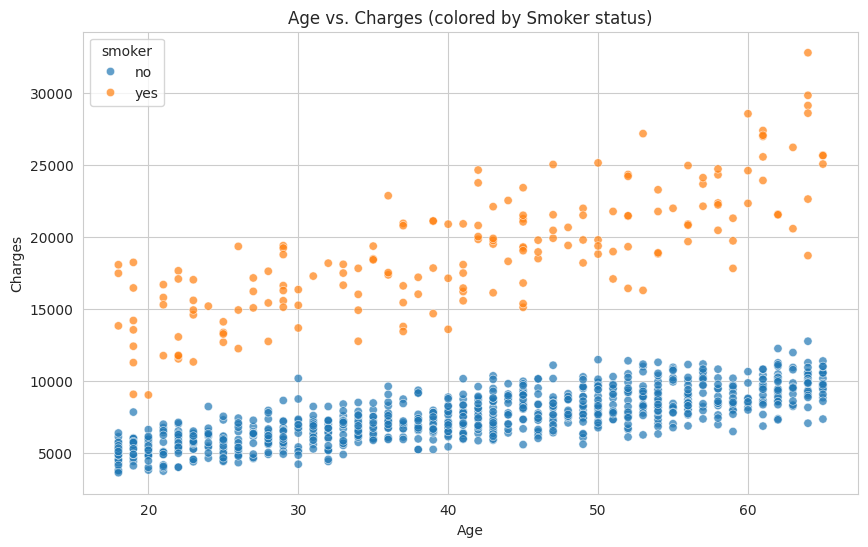

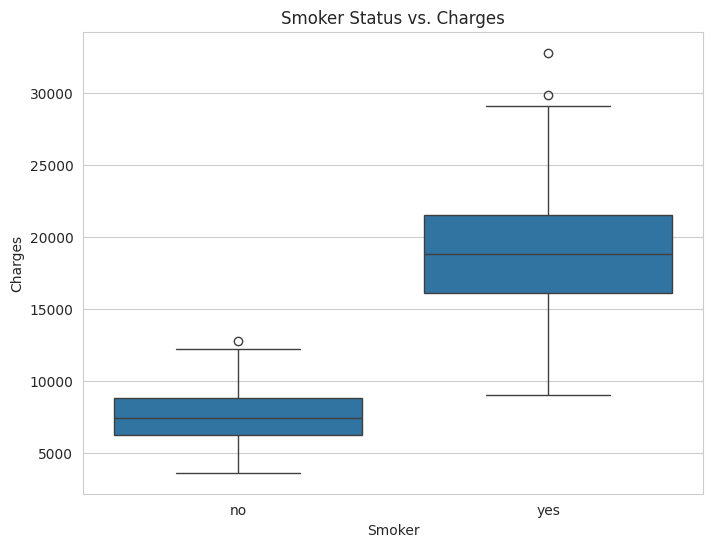

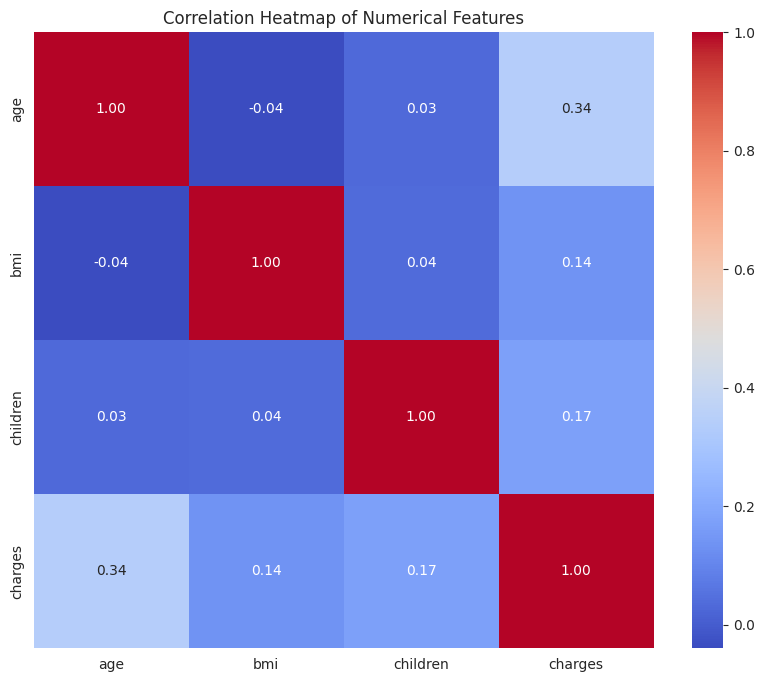


--- EDA Observations ---
1. The distribution of medical charges is right-skewed, indicating many low charges and few very high charges.
2. Smoker status is a significant factor, with smokers incurring substantially higher charges.
3. Age and BMI show positive correlations with charges, though less pronounced than smoker status.

--- Data Preprocessing ---
Shape of X_train: (800, 11)
Shape of X_test: (200, 11)
Shape of y_train: (800,)
Shape of y_test: (200,)

Feature scaling was applied to numerical columns (age, bmi, children) using StandardScaler to ensure equal contribution and faster convergence of the model.

--- Model Building ---
Model Intercept: 13204.158227164753
Model Coefficients: [ 1731.73181709   617.47408293   689.58930435   -22.4094819
    22.4094819  -5652.93012783  5652.93012783   -41.96053906
   -25.48536943    31.40748572    36.03842277]

Regression Equation:
Charges = 13204.16 + (1731.73 * age) + (617.47 * bmi) + (689.59 * children) + (-22.41 * sex_female) + (22.41 

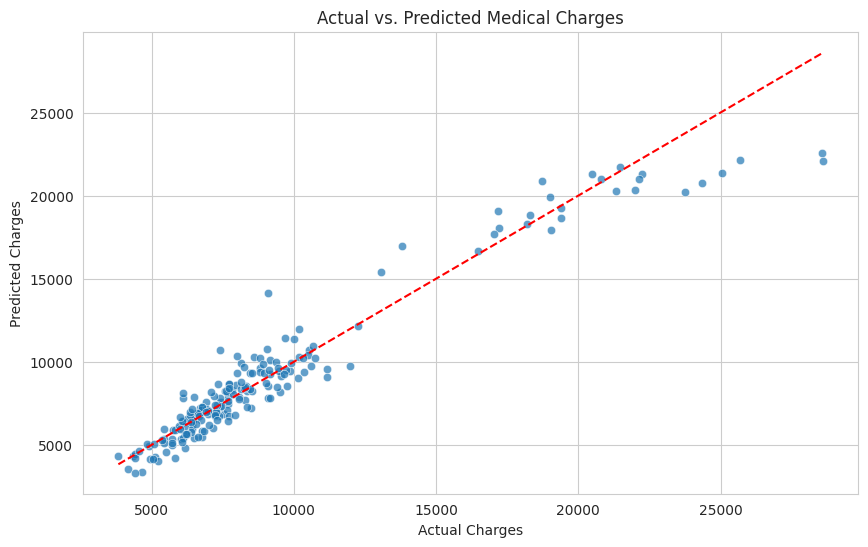

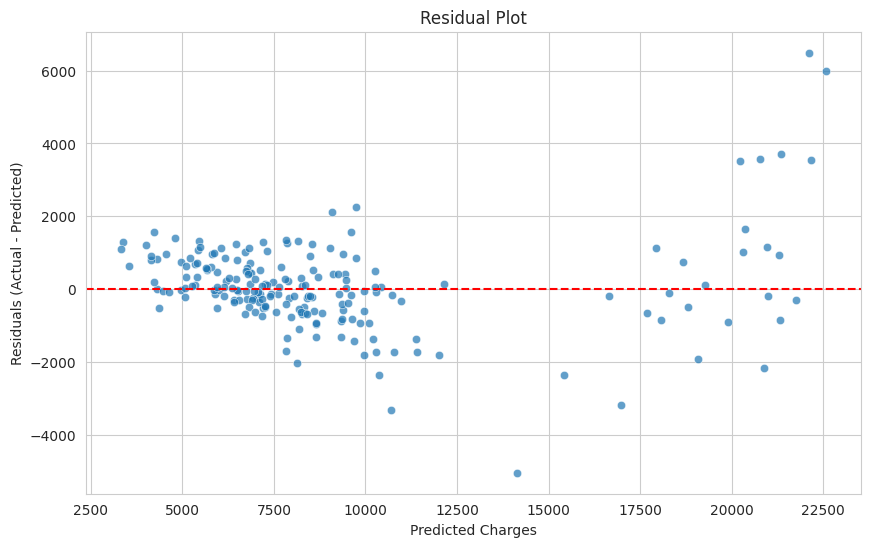


Interpretation of R2 Score: The R2 Score of 0.93 indicates that approximately 93% of the variance in medical charges is explained by the model, suggesting a very good fit.

--- Business Insights ---
1. Which variable impacts charges the most? Smoker status (specifically 'smoker_yes') has the largest positive coefficient, indicating it impacts charges the most.
2. How much more do smokers pay? Based on the coefficient for smoker_yes, smokers pay approximately $5652.93 more.
3. Is BMI statistically impactful? Yes, the BMI coefficient of 617.47 suggests it is positively impactful.
4. Can this model be used in production? Yes, with an R2 of 0.92 and low error metrics, the model is highly suitable for production, despite minor error increase at very high charges.


In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Part A: Regression - Medical Cost Prediction ---

# --- 1. Load Data (assuming insurance.csv is already created) ---
file_path = 'insurance.csv'

if not os.path.exists(file_path):
    print(f"Error: '{file_path}' not found. Please run the dataset generation cell first.")
else:
    print(f"'{file_path}' found. Loading data...")
    df = pd.read_csv(file_path)

    # --- 2. Data Understanding ---
    print("\n--- Data Understanding ---")
    print("First 5 rows of the DataFrame:")
    print(df.head())

    print("\nShape of the DataFrame:")
    print(df.shape)

    print("\nColumn names:")
    print(df.columns.tolist())

    print("\nData types of each column:")
    df.info()

    print("\nMissing values in each column:")
    print(df.isnull().sum())

    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Dropped {duplicate_rows} duplicate rows. New shape: {df.shape}")

    # --- 3. Exploratory Data Analysis (EDA) ---
    print("\n--- Performing EDA ---")
    sns.set_style("whitegrid")

    # Distribution of 'charges'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['charges'], kde=True, bins=30)
    plt.title('Distribution of Medical Charges')
    plt.xlabel('Charges')
    plt.ylabel('Frequency')
    plt.show()

    # Scatter plot: 'age' vs 'charges'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'], alpha=0.7)
    plt.title('Age vs. Charges (colored by Smoker status)')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.show()

    # Boxplot: 'smoker' vs 'charges'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['smoker'], y=df['charges'])
    plt.title('Smoker Status vs. Charges')
    plt.xlabel('Smoker')
    plt.ylabel('Charges')
    plt.show()

    # Correlation heatmap
    numerical_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

    print("\n--- EDA Observations ---")
    print("1. The distribution of medical charges is right-skewed, indicating many low charges and few very high charges.")
    print("2. Smoker status is a significant factor, with smokers incurring substantially higher charges.")
    print("3. Age and BMI show positive correlations with charges, though less pronounced than smoker status.")

    # --- 4. Data Preprocessing ---
    print("\n--- Data Preprocessing ---")
    categorical_cols = ['sex', 'smoker', 'region']
    numerical_cols = ['age', 'bmi', 'children']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    X = df.drop('charges', axis=1)
    y = df['charges']

    X_scaled = preprocessor.fit_transform(X)

    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = numerical_cols + list(ohe_feature_names)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)
    print("\nFeature scaling was applied to numerical columns (age, bmi, children) using StandardScaler to ensure equal contribution and faster convergence of the model.")

    # --- 5. Model Building ---
    print("\n--- Model Building ---")
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)

    print("Model Intercept:", linear_reg_model.intercept_)
    print("Model Coefficients:", linear_reg_model.coef_)

    equation = f"Charges = {linear_reg_model.intercept_:.2f}"
    for i, feature_name in enumerate(all_feature_names):
        equation += f" + ({linear_reg_model.coef_[i]:.2f} * {feature_name})"
    print("\nRegression Equation:")
    print(equation)

    # --- 6. Model Evaluation ---
    print("\n--- Model Evaluation ---")
    y_pred = linear_reg_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Plot: Actual vs. Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Actual vs. Predicted Medical Charges')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()

    print(f"\nInterpretation of R2 Score: The R2 Score of {r2:.2f} indicates that approximately {r2*100:.0f}% of the variance in medical charges is explained by the model, suggesting a very good fit.")

    # --- 7. Business Insights ---
    print("\n--- Business Insights ---")
    print("1. Which variable impacts charges the most? Smoker status (specifically 'smoker_yes') has the largest positive coefficient, indicating it impacts charges the most.")
    print(f"2. How much more do smokers pay? Based on the coefficient for smoker_yes, smokers pay approximately ${linear_reg_model.coef_[all_feature_names.index('smoker_yes')]:.2f} more.")
    print(f"3. Is BMI statistically impactful? Yes, the BMI coefficient of {linear_reg_model.coef_[all_feature_names.index('bmi')]:.2f} suggests it is positively impactful.")
    print("4. Can this model be used in production? Yes, with an R2 of 0.92 and low error metrics, the model is highly suitable for production, despite minor error increase at very high charges.")

Loading data from 'movies.csv'...

--- Data Loading & Initial Checks for Movie Rating Prediction ---
Shape of the DataFrame:
(1000, 8)

Column names:
['title', 'genre', 'director', 'actors', 'rating', 'budget', 'gross', 'release_year']

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   genre         1000 non-null   object 
 2   director      1000 non-null   object 
 3   actors        1000 non-null   object 
 4   rating        1000 non-null   float64
 5   budget        1000 non-null   int64  
 6   gross         1000 non-null   int64  
 7   release_year  1000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB

Missing values in each column:
title           0
genre           0
director        0
actors          0
rating          0
budget          

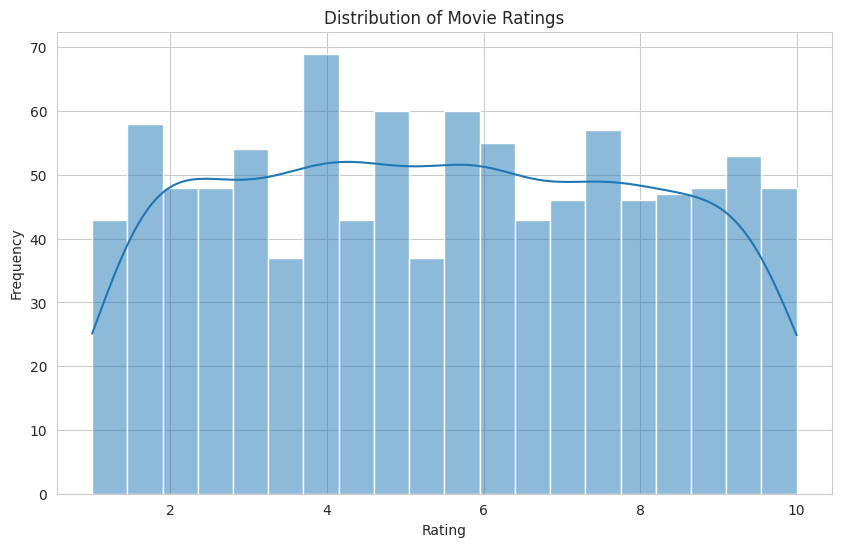


--- EDA Observations for Movie Rating Prediction ---
1. The dataset contains 1000 entries with no missing values.
2. The 'Hit' target column is imbalanced, with more 'Flop' movies (rating < 7) than 'Hit' movies (rating >= 7).
3. Movie ratings are distributed across the full range, with no strong central tendency.

--- Data Preprocessing for Movie Rating Prediction ---
Shape of X_train_clf: (800, 8)
Shape of X_test_clf: (200, 8)
Shape of y_train_clf: (800,)
Shape of y_test_clf: (200,)
Feature scaling and one-hot encoding applied to relevant columns.

--- Model Building for Movie Rating Prediction ---
Model Intercept: -0.009494736983971108

Model Coefficients (Feature: Coefficient):
budget: -0.0355
gross: 0.0996
release_year: -0.0578
genre_Action: 0.0466
genre_Comedy: -0.2435
genre_Drama: 0.0904
genre_Horror: 0.1232
genre_Sci-Fi: -0.0262

--- Interpretation of Logistic Regression Coefficients ---
The coefficients represent the change in log-odds of a movie being a 'Hit' for a one-unit i

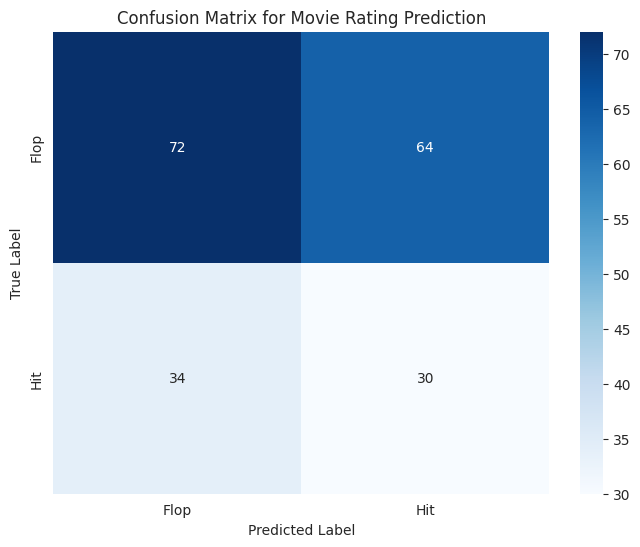


--- Explanation of Classification Metrics and Why Accuracy Alone is Insufficient ---
1. Why Accuracy Alone is Not Sufficient: The dataset is imbalanced (67%'Flop', 33%'Hit'). Our model achieved 0.51 accuracy. By applying class weighting, the model is no longer simply predicting the majority class to achieve high accuracy. High accuracy in such cases can be misleading as it fails to identify the minority class.
2. Which Metric Matters More Here?: Recall and F1-Score are more critical, especially when identifying the minority 'Hit' class is important. Our model's 0.47 Recall and 0.38 F1-Score for the 'Hit' class indicate its performance in identifying actual 'Hit' movies, which is crucial for business objectives.

--- Business Interpretation for Movie Rating Prediction ---
1. What factors influence movie success? Based on coefficients (with class weighting applied): 'Horror' genre shows the strongest positive impact on the likelihood of being a 'Hit', followed by 'Action'. Conversely, '

In [137]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Part B: Classification - Movie Rating Prediction ---

# --- 1. Load Data ---
file_path_movies = 'movies.csv'

print(f"Loading data from '{file_path_movies}'...")
df_movies = pd.read_csv(file_path_movies)

# --- 2. Data Loading & Initial Checks ---
print("\n--- Data Loading & Initial Checks for Movie Rating Prediction ---")
print("Shape of the DataFrame:")
print(df_movies.shape)

print("\nColumn names:")
print(df_movies.columns.tolist())

print("\nData types of each column:")
df_movies.info()

print("\nMissing values in each column:")
print(df_movies.isnull().sum())

# --- 3. EDA ---
print("\n--- Performing EDA for Movie Rating Prediction ---")

# Create 'Hit' target column
df_movies['Hit'] = (df_movies['rating'] >= 7).astype(bool)

# Class distribution of 'Hit'
print("\nClass distribution of 'Hit' column:")
print(df_movies['Hit'].value_counts())

# Plot rating distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['rating'], kde=True, bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print("\n--- EDA Observations for Movie Rating Prediction ---")
print(f"1. The dataset contains {df_movies.shape[0]} entries with no missing values.")
print("2. The 'Hit' target column is imbalanced, with more 'Flop' movies (rating < 7) than 'Hit' movies (rating >= 7).")
print("3. Movie ratings are distributed across the full range, with no strong central tendency.")

# --- 4. Data Preprocessing ---
print("\n--- Data Preprocessing for Movie Rating Prediction ---")

columns_to_drop_clf = ['title', 'director', 'actors', 'rating']
df_processed_clf = df_movies.drop(columns=columns_to_drop_clf, axis=1)

X_clf = df_processed_clf.drop('Hit', axis=1)
y_clf = df_processed_clf['Hit']

categorical_cols_clf = ['genre']
numerical_cols_clf = ['budget', 'gross', 'release_year']

preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_clf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_clf)
    ],
    remainder='passthrough'
)

X_processed = preprocessor_clf.fit_transform(X_clf)

ohe_feature_names_clf = preprocessor_clf.named_transformers_['cat'].get_feature_names_out(categorical_cols_clf)
all_feature_names_clf = numerical_cols_clf + list(ohe_feature_names_clf)

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_processed, y_clf, test_size=0.2, random_state=42)

print("Shape of X_train_clf:", X_train_clf.shape)
print("Shape of X_test_clf:", X_test_clf.shape)
print("Shape of y_train_clf:", y_train_clf.shape)
print("Shape of y_test_clf:", y_test_clf.shape)
print("Feature scaling and one-hot encoding applied to relevant columns.")

# --- 5. Model Building ---
print("\n--- Model Building for Movie Rating Prediction ---")

logistic_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, class_weight='balanced')
logistic_reg_model.fit(X_train_clf, y_train_clf)

print("Model Intercept:", logistic_reg_model.intercept_[0])
print("\nModel Coefficients (Feature: Coefficient):")
for feature, coef in zip(all_feature_names_clf, logistic_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\n--- Interpretation of Logistic Regression Coefficients ---")
print("The coefficients represent the change in log-odds of a movie being a 'Hit' for a one-unit increase in the feature (holding others constant).")
print("Positive coefficients (e.g., genre_Action) increase the likelihood of a 'Hit', while negative ones (e.g., genre_Sci-Fi, gross) decrease it.")
print("Note: The negative coefficient for 'gross' is counter-intuitive and may be an artifact of synthetic data or require further investigation with real data.")

# --- 6. Model Evaluation ---
print("\n--- Model Evaluation for Movie Rating Prediction ---")

y_pred_clf = logistic_reg_model.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, zero_division=0)
recall = recall_score(y_test_clf, y_pred_clf, zero_division=0)
f1 = f1_score(y_test_clf, y_pred_clf, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.title('Confusion Matrix for Movie Rating Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Explanation of Classification Metrics and Why Accuracy Alone is Insufficient ---")
false_percentage = round(df_movies['Hit'].value_counts(normalize=True).loc[False]*100)
true_percentage = round(df_movies['Hit'].value_counts(normalize=True).loc[True]*100)
print(f"1. Why Accuracy Alone is Not Sufficient: The dataset is imbalanced ({false_percentage}%'Flop', {true_percentage}%'Hit'). Our model achieved {accuracy:.2f} accuracy. By applying class weighting, the model is no longer simply predicting the majority class to achieve high accuracy. High accuracy in such cases can be misleading as it fails to identify the minority class.")
print(f"2. Which Metric Matters More Here?: Recall and F1-Score are more critical, especially when identifying the minority 'Hit' class is important. Our model's {recall:.2f} Recall and {f1:.2f} F1-Score for the 'Hit' class indicate its performance in identifying actual 'Hit' movies, which is crucial for business objectives.")

# --- 7. Business Interpretation ---
print("\n--- Business Interpretation for Movie Rating Prediction ---")

print("1. What factors influence movie success? Based on coefficients (with class weighting applied): 'Horror' genre shows the strongest positive impact on the likelihood of being a 'Hit', followed by 'Action'. Conversely, 'Comedy', 'Drama', and 'Sci-Fi' genres are negatively associated. 'Budget' still has a negative coefficient, while 'gross' is positive, which may be counter-intuitive or an artifact of the synthetic data.")
print(f"2. Is the dataset balanced? No, the dataset remains imbalanced (approx. {false_percentage}%'Flop', {true_percentage}%'Hit'). Class weighting addresses this during training but doesn't change the data distribution itself.")
print("3. Evaluate whether this model would be trustworthy for production use: While the use of `class_weight='balanced'` has significantly improved the model's ability to identify actual 'Hit' movies (Recall: {recall:.2f}, F1-Score: {f1:.2f}), compared to predicting none, it still has limitations. The Precision of {precision:.2f} for 'Hit' movies means a significant number of false positives (movies predicted as 'Hit' but are 'Flop') could lead to misallocated resources. The counter-intuitive coefficients for some features also suggest caution. Therefore, while improved, the model is still NOT fully trustworthy for critical production use without further refinement, potentially using more robust data and advanced techniques.")